
**Download GitHub Repository**

We can achieve this by executing the below code.

In [ ]:
!git clone 'https://github.com/dphi-official/Datasets/'

We need to **extract** the two zip files 'test_beg.zip' which contains testing images and 'train_beg.zip' contains images for training the model. To extract these zip files:

In [ ]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

In [147]:
# import the basic libraries
import pandas as pd
import numpy as np

**Loading Data:**

In [148]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


**To get all the image ids:**

In [ ]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths    # will get list of list of image id and image path

We have all the labels for the images in '**train_labels**' and all the filepaths in '**image_paths**'. So let's check if the number of labels we have is same as the number of images:

In [7]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


 map all the ***image paths*** to their respective ***ids*** and labels in dataframe

In [150]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


To check for images randomly if **filepath** and **filname** are correct or not.

In [9]:
print(train_data.iloc[78])

filename                          Image_79.jpg
filepath       /content/train_beg/Image_79.jpg
animal_type                              mucca
Name: 78, dtype: object


**Display an Image**

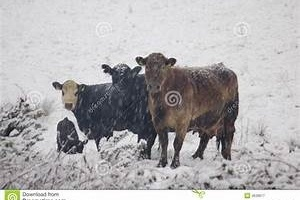

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread(image_paths[0])
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

To display the type or corresponding label of the image

In [11]:
# animal_type of above image

train_data['animal_type'][0]

'mucca'

To display the image in **grayscale**

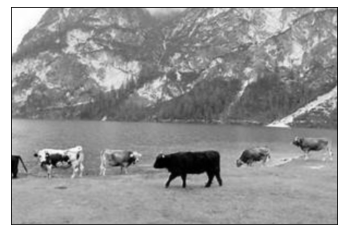

In [12]:
img = cv2.imread(image_paths[1],0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**Loading Image's Pixel Values**

store the image as well as its label inside data.

In [151]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again

To convert the **Lists** to **numpy array**:

In [152]:
X = np.asarray(data)
y = np.asarray(labels)

**Split the Data**

In [153]:
from sklearn.model_selection import train_test_split #To split the data in training and testing data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train 

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

*To check the length of training and testing data which we have split:*

In [20]:
print(len(X_train),len(X_test)) 

960 240


To check the shape of **training Image**:

In [21]:
#Check shape of training image
X_train[0].shape

(200, 300, 3)

Import required **libraries** to Build the **Model**

In [154]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import matplotlib.pyplot as plt
import datetime
import random

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Class Names:

In [155]:
#create an array to access the class name based on label number.
class_names = ['mucca', 'pecora']

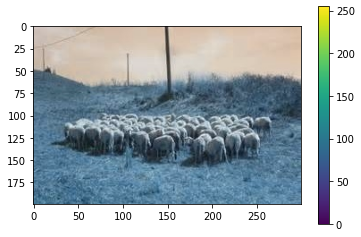

In [24]:
#check the range of pixel values
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Display any random image along with its corresponding label.**

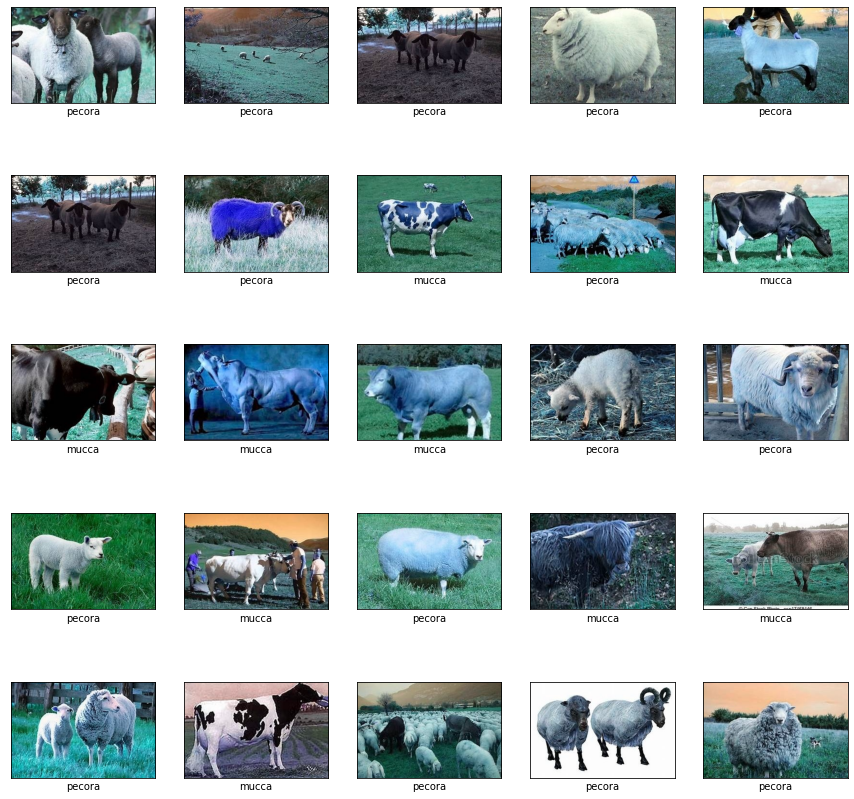

In [25]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(X_train))     
  plt.imshow(X_train[rand_no], cmap='gray')
  plt.xlabel(class_names[y_train[rand_no]])

**Normalize** the *data* to bring all the variables to the *same range*.

In [156]:
#Normalizing the pixel values
X_train = X_train / 255.0

In [ ]:
X_train

**Model Creation** using **Sequential:-**

The first layer is the Flatten layer with the input shape of(200,300,3)
The shape of our training image was (200,300,3) Therefore, we have provided our input shape with the training image size. 
Next, we created the hidden layer with 100 neurons and activation function "relu" which is best for the hidden layers.
Last layer is created with a single neuron and activation function "sigmoid" is used.


In [157]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=(200,300,3)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

using **model.summary()** print the summary of the model.

Next, we Compiled our model with the optimizer "**adam**" and loss function we used is "**binary_crossentropy**" as our model contains only two labels i.e. **0(mucca**) or **1(pecora)**

In [158]:
model = create_model()
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               18000100  
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 18,000,201
Trainable params: 18,000,201
Non-trainable params: 0
_________________________________________________________________


**Training the model:-**

In [159]:
training_history = model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size = 25,
          validation_split=0.2,
          verbose=1,
         # callbacks=[tensorboard_callback,earlystopping_callback]
          )

Epoch 1/10
31/31 [==============================] - 3s 111ms/step - loss: 17.4246 - accuracy: 0.5326 - val_loss: 5.7833 - val_accuracy: 0.5260
Epoch 2/10
31/31 [==============================] - 3s 111ms/step - loss: 2.2547 - accuracy: 0.5938 - val_loss: 0.9290 - val_accuracy: 0.6354
Epoch 3/10
31/31 [==============================] - 3s 111ms/step - loss: 0.7652 - accuracy: 0.6927 - val_loss: 1.5477 - val_accuracy: 0.5573
Epoch 4/10
31/31 [==============================] - 3s 112ms/step - loss: 1.0947 - accuracy: 0.6745 - val_loss: 1.2249 - val_accuracy: 0.5677
Epoch 5/10
31/31 [==============================] - 3s 112ms/step - loss: 0.5885 - accuracy: 0.7305 - val_loss: 0.7272 - val_accuracy: 0.6406
Epoch 6/10
31/31 [==============================] - 3s 111ms/step - loss: 0.4281 - accuracy: 0.8021 - val_loss: 0.9808 - val_accuracy: 0.5625
Epoch 7/10
31/31 [==============================] - 3s 112ms/step - loss: 0.4286 - accuracy: 0.7904 - val_loss: 1.3332 - val_accuracy: 0.5417
Epoch

**Plot the model**

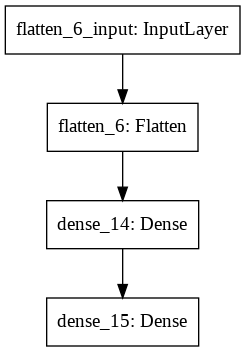

In [160]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

**Model Accuracy**

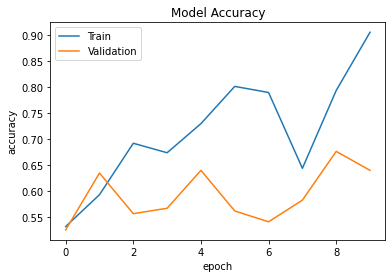

In [161]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Model Loss**

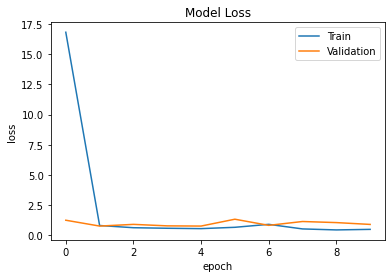

In [120]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [170]:
!kill 1602

In [171]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

**Load the Test Data:**

In [122]:
# Get the csv file given 'Testing_set_animals.csv'
test_image_ids = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_image_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


**Image paths** for test data

In [ ]:
# Get image paths
image_paths = ['/content/test_beg/' + fname for fname in test_image_ids['filename']]
image_paths

To Confirm if **number of images** is same as **number of labels** given

In [139]:
# Confirm if number of images is same as number of labels given
if len(test_image_ids) == len(image_paths):
    print('Number of labels i.e. ', len(test_image_ids), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  400 matches the number of filepaths i.e.  400


**File name**

In [124]:
image_id = test_image_ids['filename'].values

**Dataframe of imageids and filepaths**

In [125]:
 #Create dataframe of image ids and filepaths
test_data = pd.DataFrame({'filename': image_id, 'filepath': image_paths})
test_data.head()

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


**To load the pixel values of test data(images)**

In [126]:
# Load image pixels using cv2
image_pixels = []
for i in range(len(test_data)):
  img_array = cv2.imread(test_data['filepath'][i])
  image_pixels.append(img_array)

**Normalize the test data images and predict on the normalize test values**

In [127]:
testarr = np.asarray(image_pixels)
testarr = testarr / 255.0
predictions = model.predict(testarr)

**np.round()** will return the nearest integer value.

In [129]:
prediction = np.round(predictions)

In [131]:
pred = []
for item in prediction:
  pred.append(item)

In [132]:
pre = [] 
for i in range(len(test_data)):
  if pred[i] == 0:           # if respective image's label is mucca
    pre.append('mucca')
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    pre.append('pecora') 

**to save prediction results**

In [141]:
res = pd.DataFrame({'filename': test_data['filename'], 'animal_type': pre})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>